In [79]:
import pandas as pd

In [1]:
from blocks.get_raw_df import get_raw_df

2024-10-06 23:37:22,537 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-10-06 23:37:22,539 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-10-06 23:37:22,564 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-10-06 23:37:22,566 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-10-06 23:37:22,644 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-10-06 23:37:22,645 INFO sqlalchemy.engine.Engine [raw sql] {}


In [2]:
fill_df = get_raw_df()

2024-10-06 23:38:11,757 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-10-06 23:38:11,760 INFO sqlalchemy.engine.Engine select * from ane_base.parser_app_pricesraw
2024-10-06 23:38:11,761 INFO sqlalchemy.engine.Engine [raw sql] {}


In [4]:
site_links = fill_df[fill_df.date=='2024-10-06'].site_link.unique()

In [7]:
raw_df = fill_df[fill_df.site_link.isin(site_links)]

In [10]:
median_prices = raw_df.groupby(['date', 'category_id'])['price_new'].median()

In [13]:
median_prices = median_prices.reset_index()

<Axes: xlabel='date'>

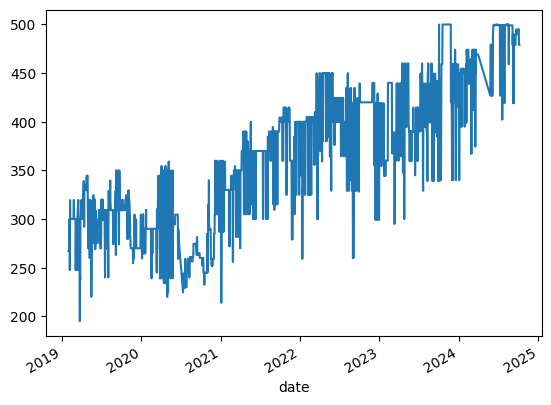

In [18]:
median_prices[median_prices.category_id==2].set_index('date')['price_new'].plot()

In [22]:
raw_df['median_price'] = raw_df.groupby(['date', 'category_id'])['price_new'].transform(lambda x: x.median())

C:\Users\user\AppData\Local\Temp\ipykernel_5136\1819029307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['median_price'] = raw_df.groupby(['date', 'category_id'])['price_new'].transform(lambda x: x.median())


In [36]:
raw_df['price_ratio'] = raw_df.price_new / raw_df.median_price

C:\Users\user\AppData\Local\Temp\ipykernel_5136\3640978268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['price_ratio'] = raw_df.price_new / raw_df.median_price


In [37]:
raw_df = raw_df.sort_values('date')

In [52]:
raw_df = raw_df.groupby('site_link').apply(lambda x: x.sort_values('date'))

C:\Users\user\AppData\Local\Temp\ipykernel_5136\3763762248.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  raw_df = raw_df.groupby('site_link').apply(lambda x: x.sort_values('date'))


In [57]:
raw_df = raw_df.reset_index(drop=True)

In [59]:
raw_df['price_change'] = raw_df.groupby('site_link')['price_new'].transform(lambda x: x.pct_change())

In [60]:
raw_df['is_change'] = raw_df['price_change']!=0

In [61]:
raw_df = raw_df.dropna()

In [70]:
sample = raw_df[(raw_df.is_change==True)]['price_ratio']-1

In [83]:
raw_df['is_future_change'] = raw_df.groupby('site_link')['is_change'].transform(lambda x: pd.Series(index=x.index, data=list(x[1:])+[None]))

C:\Users\user\AppData\Local\Temp\ipykernel_5136\3854414661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['is_future_change'] = raw_df.groupby('site_link')['is_change'].transform(lambda x: pd.Series(index=x.index, data=list(x[1:])+[None]))


In [82]:
raw_df

,date,type,category_id,category_title,site_title,price_new,price_old,site_unit,site_link,site_code,miss,id,median_price,price_ratio,price_change,is_change
1,2019-08-02,food,3,Баранина (кроме бескостного мяса),"Баранья голяшка, 1 упаковка (300-500 г)",399.99,-1,за 1 кг,https://online.globus.ru/products/baranya-goly...,globus,0.0,1417393,549.99,0.727268,0.0,False
2,2019-08-03,food,3,Баранина (кроме бескостного мяса),"Баранья голяшка, 1 упаковка (300-500 г)",399.99,-1,за 1 кг,https://online.globus.ru/products/baranya-goly...,globus,0.0,1417394,549.99,0.727268,0.0,False
3,2019-08-04,food,3,Баранина (кроме бескостного мяса),"Баранья голяшка, 1 упаковка (300-500 г)",399.99,-1,за 1 кг,https://online.globus.ru/products/baranya-goly...,globus,0.0,1417395,549.99,0.727268,0.0,False
4,2019-08-05,food,3,Баранина (кроме бескостного мяса),"Баранья голяшка, 1 упаковка (300-500 г)",399.99,-1,за 1 кг,https://online.globus.ru/products/baranya-goly...,globus,0.0,1417396,549.99,0.727268,0.0,False
5,2019-08-06,food,3,Баранина (кроме бескостного мяса),"Баранья голяшка, 1 упаковка (300-500 г)",399.99,-1,за 1 кг,https://online.globus.ru/products/baranya-goly...,globus,0.0,1417397,549.99,0.727268,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574637,2024-10-02,food,8,Масло подсолнечное,Масло подсолнечное Золотая Семечка рафинирован...,159.00,-1,1л,https://www.vprok.ru/product/zolotaya-semechka...,vprok,0.0,2501308,152.99,1.039284,0.0,False
574638,2024-10-03,food,8,Масло подсолнечное,Масло подсолнечное Золотая Семечка рафинирован...,159.00,-1,1л,https://www.vprok.ru/product/zolotaya-semechka...,vprok,0.0,2501683,151.49,1.049574,0.0,False
574639,2024-10-04,food,8,Масло подсолнечное,Масло подсолнечное Золотая Семечка рафинирован...,159.00,-1,1л,https://www.vprok.ru/product/zolotaya-semechka...,vprok,0.0,2502060,151.49,1.049574,0.0,False
574640,2024-10-05,food,8,Масло подсолнечное,Масло подсолнечное Золотая Семечка рафинирован...,159.00,-1,1л,https://www.vprok.ru/product/zolotaya-semechka...,vprok,0.0,2502428,151.49,1.049574,0.0,False


In [87]:
raw_df[(raw_df.date.between('2019-06-15', '2019-07-15'))&(raw_df.site_title == 'Творог детский Агуша Груша 3.9% 100г')].sort_values('date')

,date,type,category_id,category_title,site_title,price_new,price_old,site_unit,site_link,site_code,miss,id,median_price,price_ratio,price_change,is_change,is_future_change
317631,2019-06-15,food,12,Творог нежирный,Творог детский Агуша Груша 3.9% 100г,28.9,-1,шт,https://www.vprok.ru/product/agusha-agusha-tvo...,vprok,0.0,900621,48.490,0.595999,0.000000,False,False
317632,2019-06-18,food,12,Творог нежирный,Творог детский Агуша Груша 3.9% 100г,28.9,-1,шт,https://www.vprok.ru/product/agusha-agusha-tvo...,vprok,0.0,900622,48.490,0.595999,0.000000,False,True
317633,2019-06-19,food,12,Творог нежирный,Творог детский Агуша Груша 3.9% 100г,26.9,-1,шт,https://www.vprok.ru/product/agusha-agusha-tvo...,vprok,0.0,900623,48.490,0.554754,-0.069204,True,False
317634,2019-06-20,food,12,Творог нежирный,Творог детский Агуша Груша 3.9% 100г,26.9,-1,шт,https://www.vprok.ru/product/agusha-agusha-tvo...,vprok,0.0,900624,48.490,0.554754,0.000000,False,True
317635,2019-06-21,food,12,Творог нежирный,Творог детский Агуша Груша 3.9% 100г,28.9,-1,шт,https://www.vprok.ru/product/agusha-agusha-tvo...,vprok,0.0,900625,48.490,0.595999,0.074349,True,False
317636,2019-06-22,food,12,Творог нежирный,Творог детский Агуша Груша 3.9% 100г,28.9,-1,шт,https://www.vprok.ru/product/agusha-agusha-tvo...,vprok,0.0,900626,48.490,0.595999,0.000000,False,False
317637,2019-06-23,food,12,Творог нежирный,Творог детский Агуша Груша 3.9% 100г,28.9,-1,шт,https://www.vprok.ru/product/agusha-agusha-tvo...,vprok,0.0,900627,48.490,0.595999,0.000000,False,False
317638,2019-06-24,food,12,Творог нежирный,Творог детский Агуша Груша 3.9% 100г,28.9,-1,шт,https://www.vprok.ru/product/agusha-agusha-tvo...,vprok,0.0,900628,48.490,0.595999,0.000000,False,True
317639,2019-06-28,food,12,Творог нежирный,Творог детский Агуша Груша 3.9% 100г,25.9,-1,шт,https://www.vprok.ru/product/agusha-agusha-tvo...,vprok,0.0,900629,48.490,0.534131,-0.103806,True,False
317640,2019-06-29,food,12,Творог нежирный,Творог детский Агуша Груша 3.9% 100г,25.9,-1,шт,https://www.vprok.ru/product/agusha-agusha-tvo...,vprok,0.0,900630,43.900,0.589977,0.000000,False,False


In [89]:
raw_df = raw_df.dropna()

In [94]:
sample = (raw_df[(raw_df.is_future_change==True)].price_ratio-1)#.hist()

<Axes: >

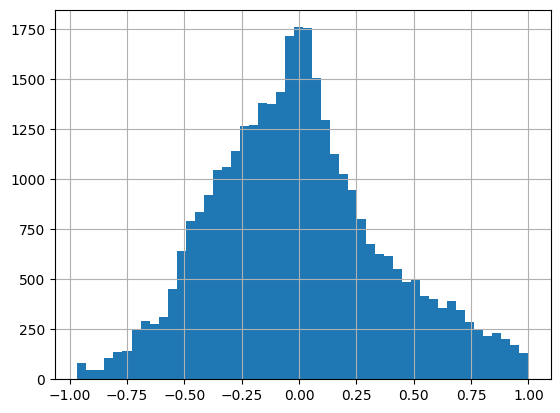

In [100]:
sample[(sample!=0)&(abs(sample)<1)].hist(bins=50)